# Project: Instance-Based (Support Vector Machine (SVM))
## Name: Melody Goldanloo

In [1]:
#Example of supress warnings for Numpy version out of range (optional)
import warnings
warnings.filterwarnings("ignore", category=Warning)
warnings.simplefilter(action='ignore', category=FutureWarning)

#Some recommended libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

# The Dataset
You will be using the Parkinson's Disease dataset, which includes various biomedical voice measurements from people with and without Parkinson's disease. This dataset is unique and provides a real-world application for predicting Parkinson's disease. You can access the data from the below URL.

### Dataset Description:

The Parkinson's Disease dataset contains 195 samples with 23 features each, such as average vocal fundamental frequency, variation in fundamental frequency, measures of variation in amplitude, and more.

The target variable indicates the presence (1) or absence (0) of Parkinson's disease.

In [2]:
# Load the Parkinson's Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
df = pd.read_csv(url)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Data Preprocessing

### Data Exploration

In [22]:
# Exploration
df.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [23]:
# More exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Visualization

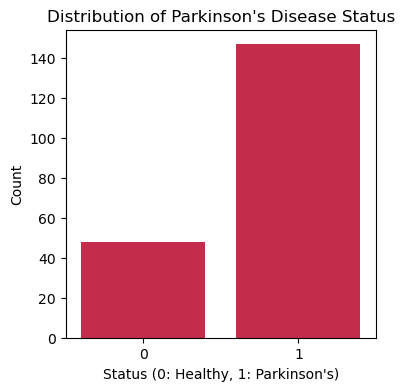

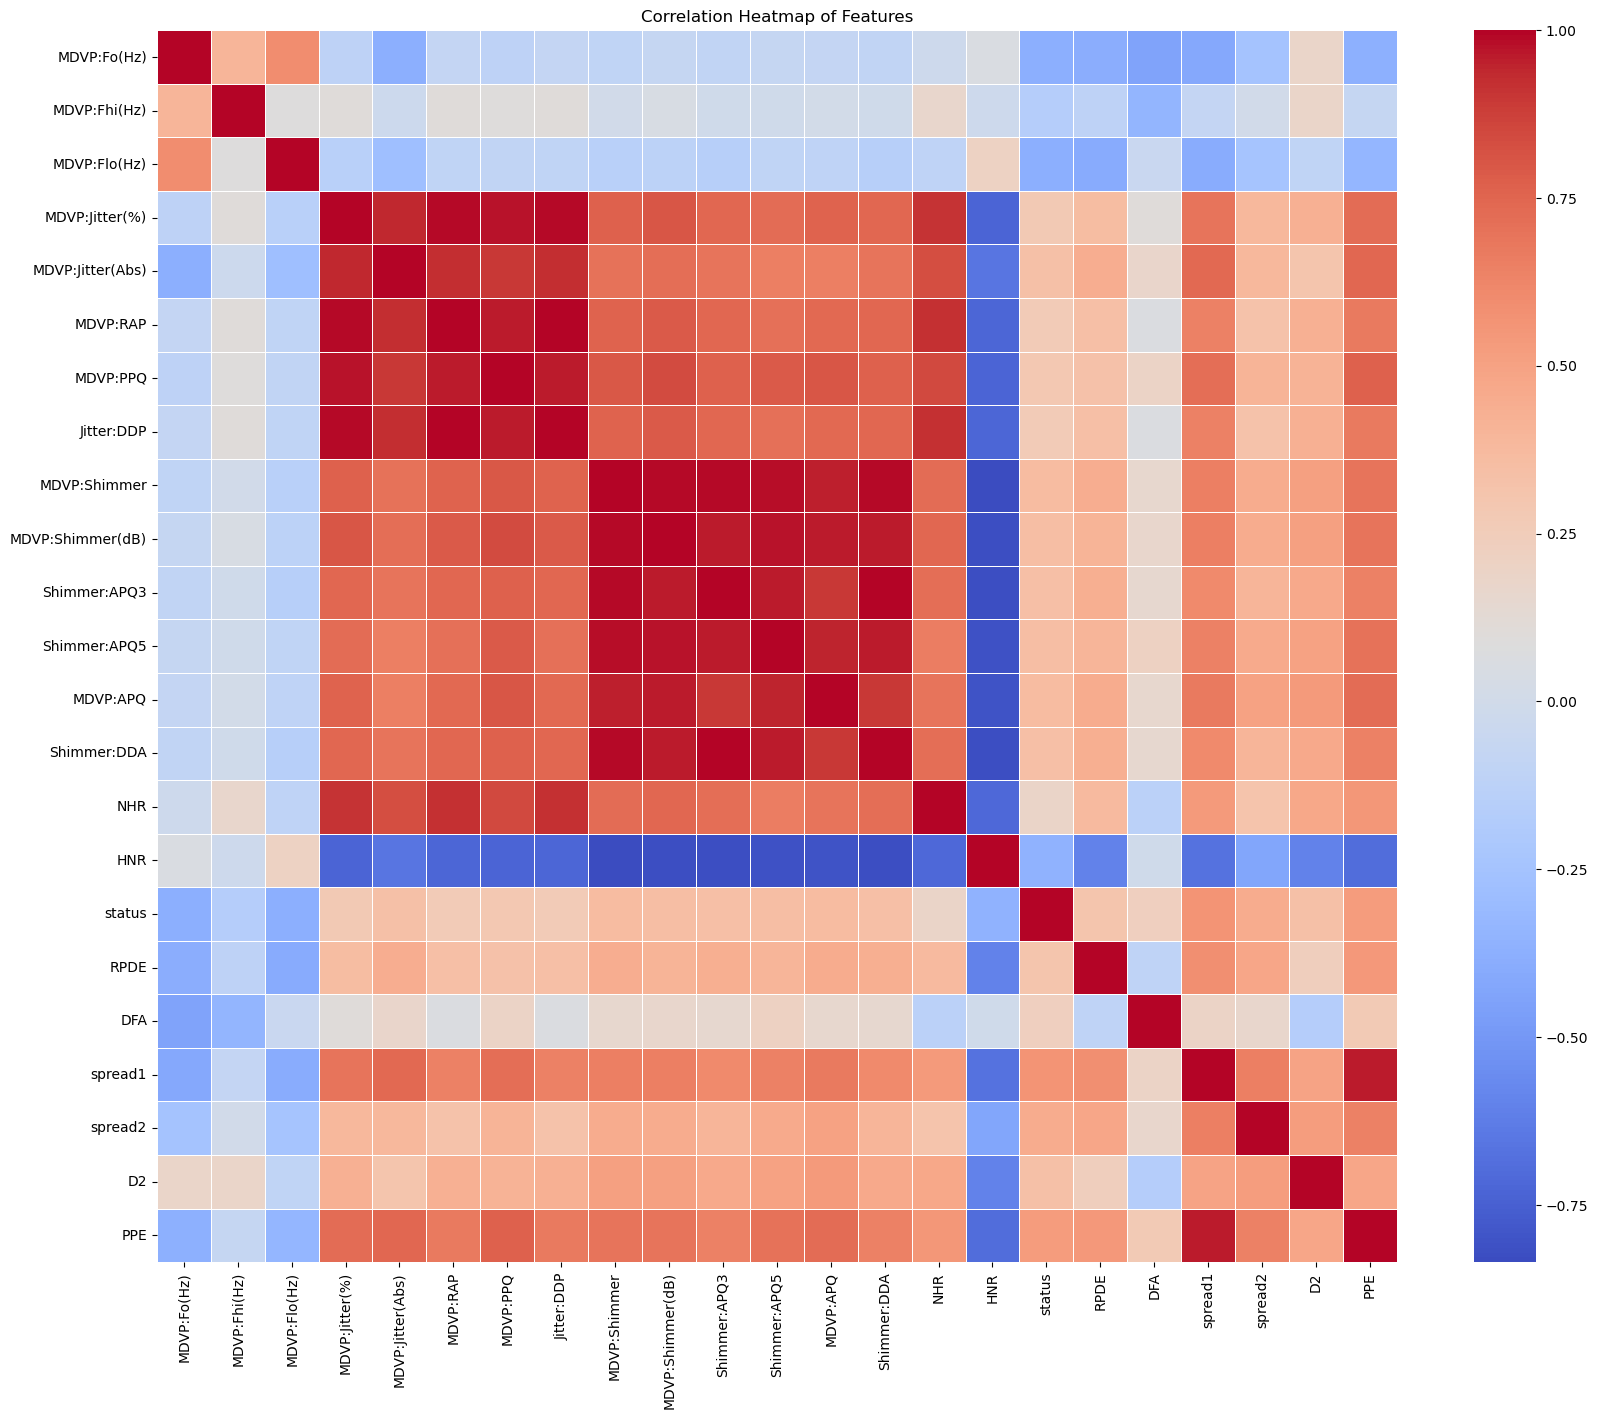

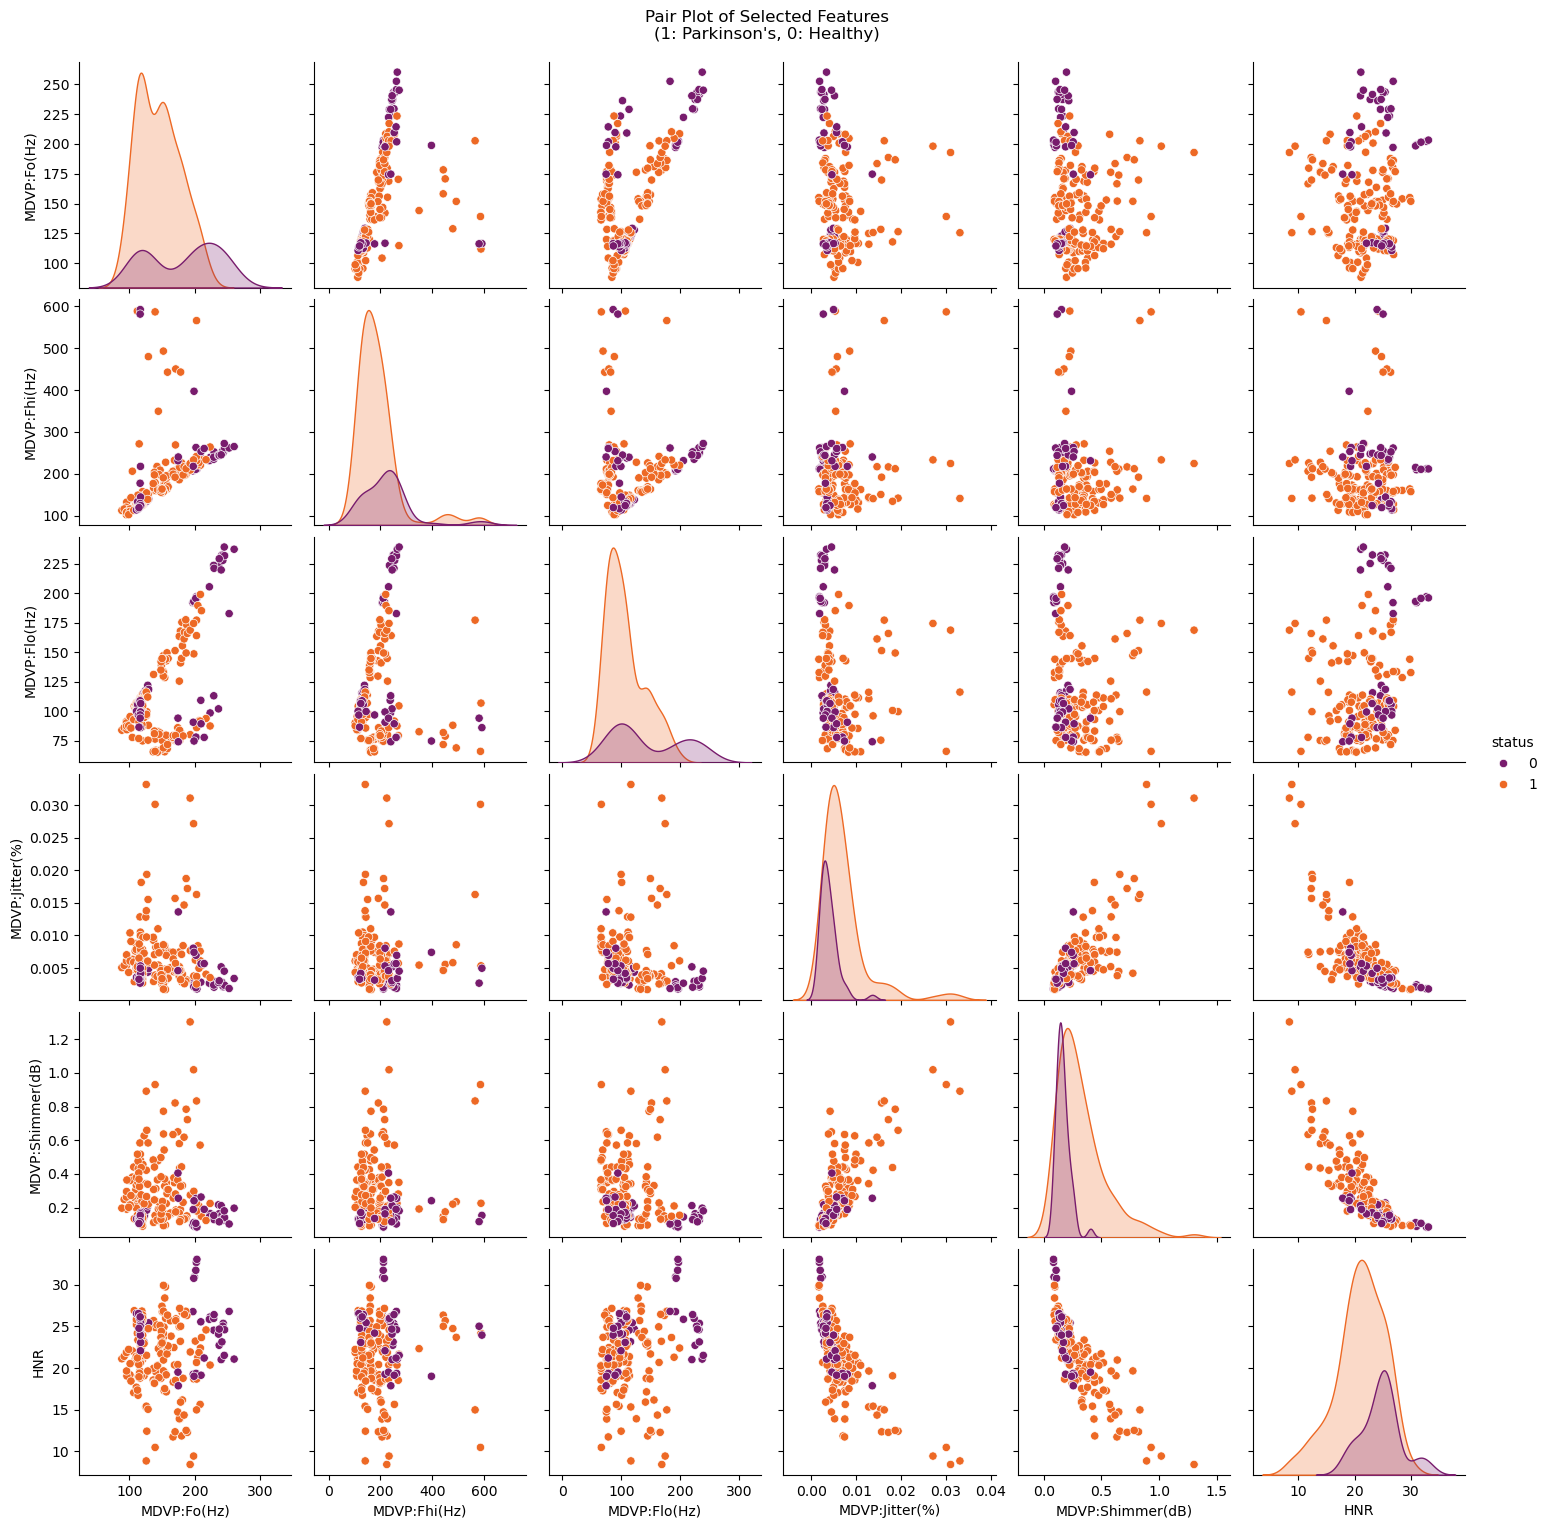

In [37]:
# Starting with a pairplot to visualize the relationships between the features and choosing the most important ones
#sns.pairplot(df)
#plt.show()

# Distribution of target variable (counts)
plt.figure(figsize=(4, 4))
sns.countplot(x='status', data=df, color='crimson')
plt.title('Distribution of Parkinson\'s Disease Status')
plt.xlabel('Status (0: Healthy, 1: Parkinson\'s)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(20, 16))
correlation_matrix = df.drop('name', axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()
# DFA isn't very correlated with other features.
# HNR is moderately correlated with other features
# Using this to determine which features to include in the pair plot

# Pair plot for selected features
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer(dB)','HNR', 'status']
sns.pairplot(df[selected_features], hue='status', palette='inferno')
plt.suptitle('Pair Plot of Selected Features\n(1: Parkinson\'s, 0: Healthy)', y=1.02)
plt.show()

### Missing Values and Duplicates

In [14]:
# Check for missing values
df.isnull().sum()
# no missing values! :D

# Check for duplicates
df.duplicated().sum()
# no duplicates! :D

0

### Standardization & Train-Test Split

In [15]:
# Separate features and target
X = df.drop(columns=['name', 'status'])  # Features
y = df['status']  # Target 

# Encoding Categorical Variables
# No categorical variables to encode

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
# I'm deciding to standardize the features AFTER the train-test split because I want to avoid data leakage
# and to follow the example given in the ModelSelection_SVM.ipynb instructional file.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 


# Building the SVM Model
#### Model Initialization:

Choosing Hyperparameters: Explain key hyperparameters such as the kernel type (linear, polynomial, RBF), regularization parameter (C), and gamma. Provide specific values to try.

SVM Initialization: Use the SVC (Support Vector Classification) class from Scikit-learn, specifying the chosen hyperparameters.

Model Fitting: Fit the SVM model to the standardized Parkinson's Disease dataset.

In [38]:
# creating and training models for each kernel (linear, polynomial, RBF)
svm_linear = SVC(kernel='linear', C=1, gamma='scale')
svm_poly = SVC(kernel='poly', C=1, gamma='scale', degree=3)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')

# fit each model
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# make predictions for each model
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)


# Evaluating the Model
Performance Metrics: Calculate metrics such as accuracy, precision, recall, F1 score, and confusion matrix to evaluate the model. These metrics provide insights into the model’s predictive performance and its ability to generalize.

In [40]:
for name, y_pred in [("Linear", y_pred_linear), ("Polynomial", y_pred_poly), ("RBF", y_pred_rbf)]:
    print(f"\nResults for {name} kernel:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Precision Score:", precision_score(y_test, y_pred))
    # Precision measures the proportion of true positives among all predicted positives
    print("Recall Score:", recall_score(y_test, y_pred))
    # Recall measures the proportion of true positives among all actual positives
    print("F1 Score:", f1_score(y_test, y_pred))
    # F1 score is the mean of precision and recall


# Linear Confusion Matrix:
#   Correctly predicted 3 non-Parkinson's cases and 31 Parkinson's cases
#   Incorrectly predicted 1 Parkinson's case as negative and 4 non-Parkinson's cases as positive.
# Linear Accuracy Score: Correctly classified 87.18% of the cases
# Linear Precision Score: 88.57% of the predicted Parkinson's cases were actually correct
# Linear Recall Score: 96.88% of the actual Parkinson's cases were correctly identified
# Linear F1 Score: 92.68% of the predictions were correct

# Polynomial Confusion Matrix:
#   Correctly predicted 2 non-Parkinson's cases and 30 Parkinson's cases
#   Incorrectly predicted 2 Parkinson's cases as negative and 5 non-Parkinson's cases as positive.
# Polynomial Accuracy Score: Correctly classified 82.05% of the cases
# Polynomial Precision Score: 85.71% of the predicted Parkinson's cases were actually correct
# Polynomial Recall Score: 93.75% of the actual Parkinson's cases were correctly identified
# Polynomial F1 Score: 89.55% of the predictions were correct

# RBF Confusion Matrix:
#   Correctly predicted 2 non-Parkinson's cases and 31 Parkinson's cases
#   Incorrectly predicted 1 Parkinson's case as negative and 5 non-Parkinson's cases as positive.
# RBF Accuracy Score: Correctly classified 84.62% of the cases
# RBF Precision Score: 86.11% of the predicted Parkinson's cases were actually correct
# RBF Recall Score: 96.88% of the actual Parkinson's cases were correctly identified
# RBF F1 Score: 91.18% of the predictions were correct


Results for Linear kernel:
Confusion Matrix:
[[ 3  4]
 [ 1 31]]
Accuracy Score: 0.8717948717948718
Precision Score: 0.8857142857142857
Recall Score: 0.96875
F1 Score: 0.9253731343283582

Results for Polynomial kernel:
Confusion Matrix:
[[ 2  5]
 [ 2 30]]
Accuracy Score: 0.8205128205128205
Precision Score: 0.8571428571428571
Recall Score: 0.9375
F1 Score: 0.8955223880597015

Results for RBF kernel:
Confusion Matrix:
[[ 2  5]
 [ 1 31]]
Accuracy Score: 0.8461538461538461
Precision Score: 0.8611111111111112
Recall Score: 0.96875
F1 Score: 0.9117647058823529
